### Урок 8
### Дисперсионный анализ. Метод главных компонент. Логистическая регрессия

### Задача 1
#### Используя данные о хоккеистах, проверьте, является ли среди хоккеистов из Финляндии, Норвегии и Дании значимым отличие: а) роста, б) BMI.

In [202]:
import numpy as np
import pandas as pd
from scipy import stats

In [203]:
df = pd.read_csv("./hockey_players.csv")
df.sample(5)

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
1681,2006,DEN,18,reinert thomas,F,R,183,85.0,1980-01-17,frederikshavn ik,26.286105,1980,25.381469
1717,2006,ITA,28,de toni manuel,F,L,181,90.0,1979-01-10,hc alleghe,27.304586,1979,27.471689
1344,2005,FIN,12,jokinen olli,F,L,188,90.0,1978-12-05,ifk helsinki,26.403833,1978,25.464011
167,2001,GER,47,kunast christian,G,L,180,82.0,1971-03-07,munchen barons,30.151951,1971,25.308642
2377,2010,RUS,43,kulikov dmitri,D,L,185,84.0,1990-10-29,florida panthers,19.504449,1990,24.543462


In [204]:
fin = df[df['country'] == 'FIN']
fin.sample(5)

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
2110,2008,FIN,40,lepisto sami,D,L,178,85.0,1984-10-17,hershey bears,23.537303,1984,26.827421
3197,2016,FIN,56,pulkkinen teemu,F,R,180,90.0,1992-01-02,detroit red wings,24.328542,1992,27.777778
1687,2006,FIN,6,saravo pekka,D,L,189,94.0,1979-11-13,lulea hf,26.464066,1979,26.315053
2406,2010,FIN,30,tarkki iiro,G,L,189,86.0,1985-07-01,blues espoo,24.832307,1985,24.075474
2825,2013,FIN,39,viitaluoma ville,F,L,184,89.0,1981-02-16,hpk hameenlinna,32.202601,1981,26.287807


In [205]:
nor = df[df['country']=='NOR']
nor.sample(5)

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
254,2001,NOR,33,martinsen tommy,F,L,181,80.0,1976-12-24,valerenga if,24.350445,1976,24.419279
2157,2008,NOR,30,smith ruben,G,L,181,75.0,1987-04-15,dragons storhamar,21.045859,1987,22.893074
2997,2014,NOR,18,lovlie jonas djupvik,F,L,188,87.0,1990-10-14,sparta sarpsborg,23.545517,1990,24.615211
2465,2010,NOR,40,olimb ken andre,F,L,178,80.0,1989-01-21,frisk asker,21.273101,1989,25.249337
1753,2006,NOR,16,ryman erik,D,L,180,87.0,1972-06-10,djurgardens if stockholm,33.889117,1972,26.851852


In [206]:
den = df[df['country']=='DEN']
den.sample(5)

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
905,2004,DEN,13,larsen ronny,F,R,180,90.0,1971-12-31,aalborg ik,32.334018,1971,27.777778
2816,2013,DEN,60,christensen mads l,F,L,179,80.0,1987-04-02,eisbaren berlin,26.080767,1987,24.968010
906,2004,DEN,15,nielsen frans,F,L,184,80.0,1984-04-24,mif redhawks malmo,20.019165,1984,23.629490
3192,2016,DEN,50,bau mathias,F,L,200,108.0,1993-07-03,frederikshavn white hawks,22.828200,1993,27.000000
895,2004,DEN,16,jensen dan,D,R,183,92.0,1969-01-16,herning ik,35.288159,1969,27.471707


### а) проверяем значимость отличий по росту.

In [207]:
y1 = np.array(den["height"])
y2 = np.array(fin["height"])
y3 = np.array(nor["height"])

In [208]:
y = np.concatenate([y1, y2, y3])
y_mean = y.mean()

In [209]:
y_mean

183.9353348729792

In [210]:
def ssb(y, y_mean):
    return (y.mean() - y_mean) ** 2 * y.shape[0]

In [211]:
ssb_all = ssb(y1, y_mean) + ssb(y2, y_mean) + ssb(y3, y_mean)
ssb_all

186.28984349590775

In [212]:
def ssw(y):
    return sum([(x - y.mean()) ** 2 for x in y])

In [213]:
ssw_all = ssw(y1) + ssw(y2) + ssw(y3)
ssw_all

11145.8995329475

In [214]:
def sst(y, y_mean):
    return sum([(x - y_mean) ** 2 for x in y])

In [215]:
sst_all = sst(y1, y_mean) + sst(y2, y_mean) + sst(y3, y_mean)
sst_all

11332.189376443424

In [216]:
sst_all - ssw_all

186.2898434959243

In [217]:
k1 = 3 - 1
k2 = y1.shape[0] + y2.shape[0] + y3.shape[0] - 3

k1, k2

(2, 430)

In [218]:
msb = ssb_all / k1
msw = ssw_all / k2

msb, msw

(93.14492174795387, 25.92069658825)

In [219]:
f = msb / msw
f

3.5934575072406427

In [220]:
a = 0.05

In [221]:
t = stats.f.ppf(1-a, k1, k2)
t

3.016700272452327

In [222]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

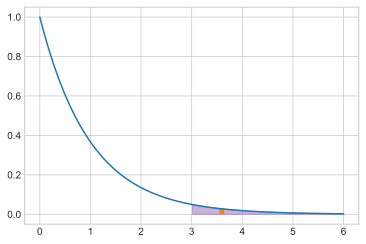

In [223]:
ox = np.linspace(0, 6, 1000)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 1000)
oy_right = stats.f.pdf(ox_right, k1, k2)

ox_f = f
oy_f = stats.f.pdf(ox_f, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, color='C4', alpha=0.5)
plt.vlines(ox_f, 0, oy_f, color='C1', linewidth=5)
plt.show()

In [224]:
f > t

True

#### Так как мы попали в критическую область, то это значит, что отличие роста хоккеистов разных стран является значимым.

In [225]:
stats.f_oneway(y1, y2, y3) # проверка решения

F_onewayResult(statistic=3.593457507240696, pvalue=0.02833215521299233)

### б) проверяем значимость отличий по bmi.

In [226]:
y1 = np.array(den['bmi'])
y2 = np.array(fin['bmi'])
y3 = np.array(nor['bmi'])

y = np.concatenate([y1, y2, y3])
y_mean = y.mean()

In [227]:
ssb_all = ssb(y1, y_mean) + ssb(y2, y_mean) + ssb(y3, y_mean)
ssw_all = ssw(y1) + ssw(y2) + ssw(y3)
sst_all = sst(y1, y_mean) + sst(y2, y_mean) + sst(y3, y_mean)
sst_all, ssb_all + ssw_all

(856.9087540510433, 856.9087540510437)

In [228]:
k1, k2 = 3 - 1, y.shape[0] - 3
k1, k2

(2, 430)

In [229]:
msb = ssb_all / k1
msw = ssw_all / k2

f = msb / msw
f

8.682513420531963

In [230]:
a = 0.05

In [231]:
t = stats.f.ppf(1-a, k1, k2)
t

3.016700272452327

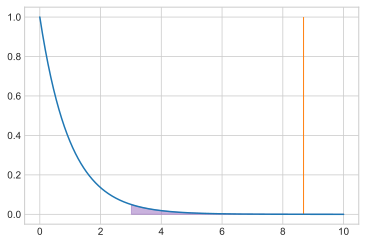

In [232]:
ox = np.linspace(0, 10, 1000)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 10, 1000)
oy_right = stats.f.pdf(ox_right, k1, k2)

ox_f = f
oy_f = stats.f.pdf(ox_f, k1, k2)


plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, color='C4', alpha=0.5)
plt.vlines(ox_f, 0, oy.max(), color='C1', linewidth=1)
plt.show()

In [233]:
f > t

True

#### Отличие 'bmi' спортсменов разных стран является значимым, принимаем альтернативную гипотезу.

In [234]:
stats.f_oneway(y1, y2, y3)  # проверка решения

F_onewayResult(statistic=8.682513420531995, pvalue=0.00020108587146857798)